In [2]:
air_index=pd.read_csv("data.csv",encoding='cp1252')

C:\Users\saumil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
air_index.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [4]:
air_index.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
air_index['date']=pd.to_datetime(air_index['date'],format='%Y %m %d')
air_index['year']=air_index['date'].dt.year
air_index.head()
air_index.drop(['sampling_date'],axis=1)
air_index.dropna(thresh=4)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15,2015.0
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18,2015.0
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21,2015.0
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24,2015.0


In [6]:
air_index.type.unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [19]:
air1=air_index[air_index['year']>=2010]
air1=air1.groupby(['year','type']).mean().reset_index()
air1
#i=air1[air1.type=='RIRUO'].index

#air1.drop(i)

,year,type,so2,no2,rspm,spm,pm2_5
0,2010.0,Industrial Area,12.475462,32.394315,129.166385,261.996338,NaN
1,2010.0,"Residential, Rural and other Areas",8.881937,23.979790,101.680916,228.134061,NaN
2,2010.0,Sensitive Area,5.343684,14.474950,53.543371,118.552590,NaN
3,2011.0,Industrial Area,14.706861,32.195795,129.365628,144.879936,NaN
4,2011.0,"Residential, Rural and other Areas",9.552387,26.388900,109.103864,145.639385,NaN
5,2011.0,Sensitive Area,4.873721,19.672445,96.863699,130.790795,NaN
6,2012.0,Industrial Area,13.676678,28.898690,124.847598,NaN,NaN
7,2012.0,"Residential, Rural and other Areas",9.872480,23.292098,105.991800,NaN,NaN
8,2012.0,Sensitive Area,5.992282,16.197676,57.478501,NaN,NaN
9,2013.0,Industrial Area,11.482347,25.156165,121.232319,81.091113,NaN


### so2 analysis by different types of area

In [13]:
plt.figure(figsize=(14,6))


<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

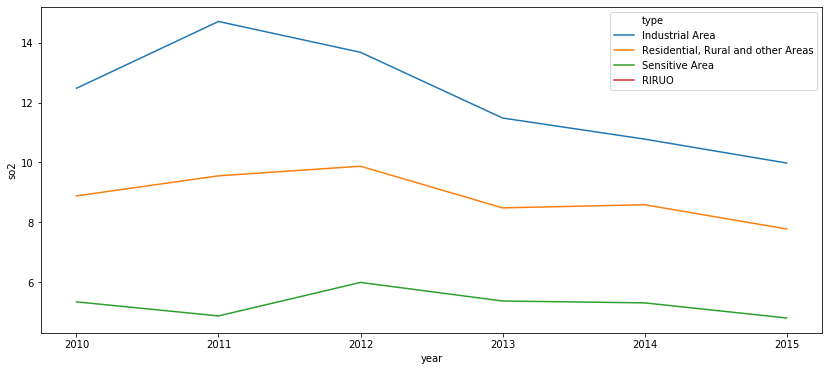

In [17]:
plt.figure(figsize=(14,6))

sns.lineplot(x=air1['year'],y=air1['so2'],hue='type',data=air1)


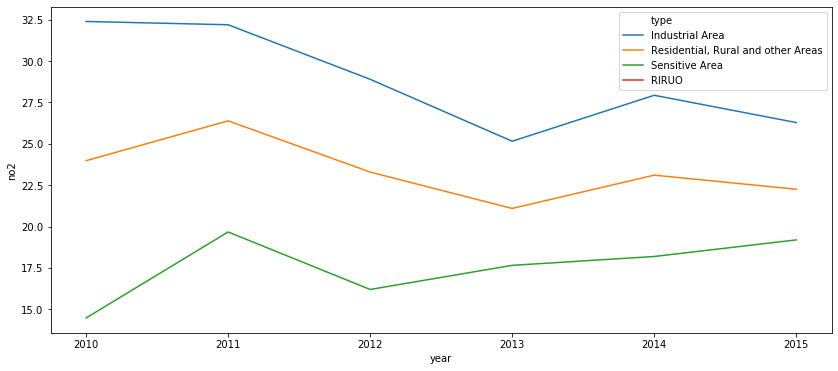

In [20]:
plt.figure(figsize=(14,6))

sns.lineplot(x=air1['year'],y=air1['no2'],hue='type',data=air1)
